In [ ]:
%store

In [3]:
%store -r __importRegression

In [4]:
__importRegression

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
endMonth = 34
#fnameTest = '../input/validation/test_' + str(endMonth) + '.csv'
#fnameTrain = '../input/validation/train_' + str(endMonth) + '.csv'
#train = pd.read_csv(fnameTrain)
#test = pd.read_csv(fnameTest)
#train = pd.read_csv('../input/train.csv')
#test = pd.read_csv('../input/test.csv')
all_data = pd.read_csv("../input/all_data_1_2_3_4_5_12_cat.csv")
items = pd.read_csv("../input/items.csv")
categories = pd.read_csv("../input/item_categories.csv")



In [6]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [7]:
all_data, NAs = reduce_mem_usage(all_data)

('Memory usage of properties dataframe is :', 2081, ' MB')
******************************
('Column: ', 'shop_id')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('uint8'))
******************************
******************************
('Column: ', 'item_id')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('uint16'))
******************************
******************************
('Column: ', 'date_block_num')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('uint8'))
******************************
******************************
('Column: ', 'target')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('int16'))
******************************
******************************
('Column: ', 'target_shop')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('int16'))
******************************
******************************
('Column: ', 'target_item')
('dtype before: ', dtype('int64'))
('dtype after: ', dtype('int16'))
***************************

In [8]:
items.head(15)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [9]:
categories.head(15)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [10]:
all_data.head()

,shop_id,item_id,date_block_num,target,target_shop,target_item,target_lag_1,target_item_lag_1,target_shop_lag_1,target_lag_2,...,target_lag_12,target_item_lag_12,target_shop_lag_12,item_category_id,target_lag_4,target_item_lag_4,target_shop_lag_4,target_lag_5,target_item_lag_5,target_shop_lag_5
0,0,19,0,0,5578,1,0,0,0,0,...,0,0,0,40,0,0,0,0,0,0
1,0,27,0,0,5578,7,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0
2,0,28,0,0,5578,8,0,0,0,0,...,0,0,0,30,0,0,0,0,0,0
3,0,29,0,0,5578,4,0,0,0,0,...,0,0,0,23,0,0,0,0,0,0
4,0,32,0,6,5578,299,0,0,0,0,...,0,0,0,40,0,0,0,0,0,0


In [34]:
sub_data = all_data.copy()

In [35]:
sub_data.head()

,shop_id,item_id,date_block_num,target,target_shop,target_item,target_lag_1,target_item_lag_1,target_shop_lag_1,target_lag_2,...,target_lag_12,target_item_lag_12,target_shop_lag_12,item_category_id,target_lag_4,target_item_lag_4,target_shop_lag_4,target_lag_5,target_item_lag_5,target_shop_lag_5
0,0,19,0,0,5578,1,0,0,0,0,...,0,0,0,40,0,0,0,0,0,0
1,0,27,0,0,5578,7,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0
2,0,28,0,0,5578,8,0,0,0,0,...,0,0,0,30,0,0,0,0,0,0
3,0,29,0,0,5578,4,0,0,0,0,...,0,0,0,23,0,0,0,0,0,0
4,0,32,0,6,5578,299,0,0,0,0,...,0,0,0,40,0,0,0,0,0,0


In [36]:
col_to_keep = ['shop_id', 'target_lag_1', 'target_lag_2', 'target_lag_3', 'target_lag_4', 'target_lag_5', 'target_lag_12']

In [37]:
col_to_drop = list(sub_data.columns.difference(col_to_keep))

In [38]:
col_to_drop

['date_block_num',
 'item_category_id',
 'item_id',
 'target',
 'target_item',
 'target_item_lag_1',
 'target_item_lag_12',
 'target_item_lag_2',
 'target_item_lag_3',
 'target_item_lag_4',
 'target_item_lag_5',
 'target_shop',
 'target_shop_lag_1',
 'target_shop_lag_12',
 'target_shop_lag_2',
 'target_shop_lag_3',
 'target_shop_lag_4',
 'target_shop_lag_5']

In [39]:
sub_data.drop(col_to_drop, axis=1, inplace=True)

In [40]:
sub_data.head()

,shop_id,target_lag_1,target_lag_2,target_lag_3,target_lag_12,target_lag_4,target_lag_5
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [28]:
sub_data.shop_id.nunique()

60

In [41]:
sub_data = sub_data.groupby('shop_id', as_index=False).sum()

In [42]:
sub_data.head()

,shop_id,target_lag_1,target_lag_2,target_lag_3,target_lag_12,target_lag_4,target_lag_5
0,0,5458.0,0.0,0.0,0.0,0.0,0.0
1,1,2913.0,0.0,0.0,0.0,0.0,0.0
2,2,29383.0,28278.0,26960.0,14301.0,25804.0,24588.0
3,3,27340.0,26372.0,25310.0,14239.0,24489.0,23296.0
4,4,42451.0,41312.0,39745.0,23003.0,38335.0,36793.0


In [43]:
cols = sub_data.columns.tolist()

In [44]:
cols

['shop_id',
 'target_lag_1',
 'target_lag_2',
 'target_lag_3',
 'target_lag_12',
 'target_lag_4',
 'target_lag_5']

In [45]:
order = ['shop_id',
 'target_lag_1',
 'target_lag_2',
 'target_lag_3',
 'target_lag_4',
 'target_lag_5',
 'target_lag_12']

In [46]:
sub_data = sub_data[order]

In [47]:
sub_data.head()

,shop_id,target_lag_1,target_lag_2,target_lag_3,target_lag_4,target_lag_5,target_lag_12
0,0,5458.0,0.0,0.0,0.0,0.0,0.0
1,1,2913.0,0.0,0.0,0.0,0.0,0.0
2,2,29383.0,28278.0,26960.0,25804.0,24588.0,14301.0
3,3,27340.0,26372.0,25310.0,24489.0,23296.0,14239.0
4,4,42451.0,41312.0,39745.0,38335.0,36793.0,23003.0


In [57]:
sub_data = sub_data.T

In [58]:
sub_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
target_lag_1,5458.0,2913.0,29383.0,27340.0,42451.0,41202.0,96158.0,65001.0,3536.0,0.0,...,74300.0,47173.0,48042.0,59990.0,178033.0,46314.0,74432.0,135201.0,79355.0,47573.0
target_lag_2,0.0,0.0,28278.0,26372.0,41312.0,39660.0,93224.0,63120.0,2563.0,0.0,...,72751.0,45712.0,46446.0,58294.0,170925.0,39342.0,72088.0,130951.0,77306.0,46194.0
target_lag_3,0.0,0.0,26960.0,25310.0,39745.0,37818.0,89988.0,60963.0,1388.0,0.0,...,70630.0,44232.0,44888.0,56367.0,163411.0,36602.0,69049.0,125794.0,74422.0,44406.0
target_lag_4,0.0,0.0,25804.0,24489.0,38335.0,36215.0,86758.0,58655.0,0.0,0.0,...,68452.0,42817.0,43407.0,54446.0,154493.0,33318.0,66287.0,120615.0,71610.0,42821.0
target_lag_5,0.0,0.0,24588.0,23296.0,36793.0,34480.0,82953.0,56258.0,0.0,0.0,...,65805.0,40941.0,41550.0,52439.0,142532.0,29376.0,62760.0,114782.0,68517.0,41040.0


In [60]:
sub_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

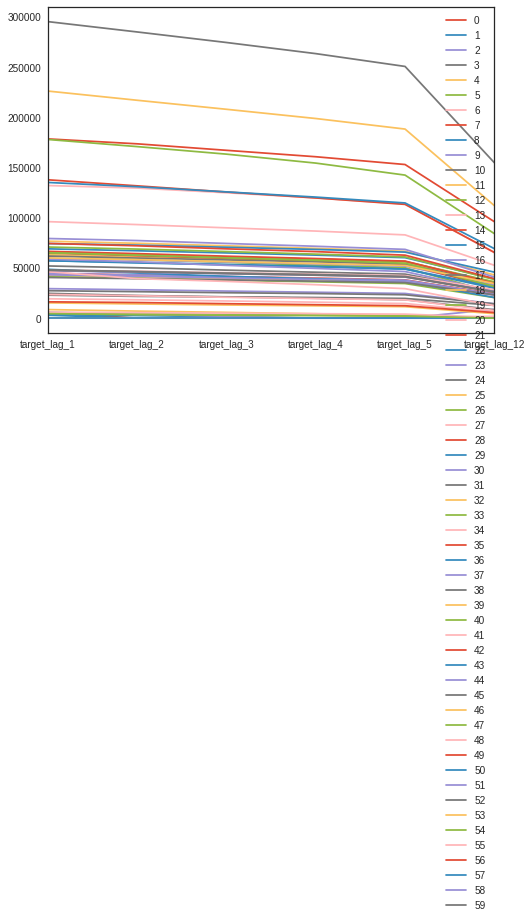

In [76]:
sub_data.plot(y=sub_data.columns)

In [56]:
sub_data.drop('shop_id', axis=1, inplace=True)

In [ ]:
sub_data.d

In [13]:
sub_data = sub_data.groupby(['shop_id', 'date_block_num'], as_index=False).agg({'target':sum})

In [14]:
sub_data.head()

,shop_id,date_block_num,target
0,0,0,5578
1,0,1,6127
2,1,0,2947
3,1,1,3364
4,2,0,1146


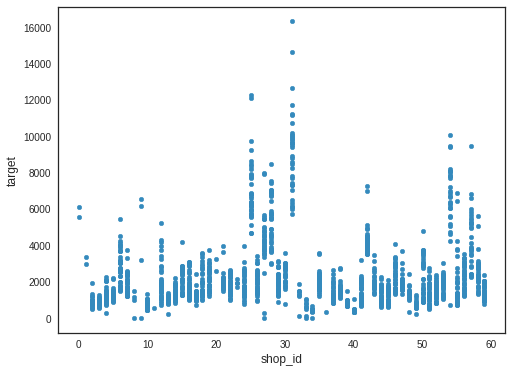

In [16]:
sub_data.plot.scatter('shop_id', 'target')

labels = test.pop('item_cnt_day')

In [ ]:
train.head()

Let's find total sales per shop

In [ ]:
train_shop = train.copy()

In [ ]:
train_shop.drop(['date', 'date_block_num', 'item_price', 'item_id'], axis=1, inplace=True)

In [ ]:
train_shop.head()

In [ ]:
train_shop = train_shop.groupby(['shop_id'], as_index=False).agg({'item_cnt_day':sum})

In [ ]:
train_shop['shop_total_sales'] = train_shop.item_cnt_day

In [ ]:
train_shop.drop('item_cnt_day', axis=1, inplace=True)

In [ ]:
train_shop.head()

In [ ]:
train_shop.plot(x='shop_id', y='shop_total_sales', kind='bar')

In [ ]:
train = pd.merge(train, train_shop, left_on='shop_id', right_on='shop_id')

In [ ]:
train.head()

In [ ]:
train_items = train.copy()

In [ ]:
train_items.drop(['date', 'date_block_num', 'shop_id', 'item_price', 'shop_total_sales'], axis=1, inplace=True)

In [ ]:
train_items.head()

In [ ]:
train_items = train_items.groupby(['item_id'], as_index=False).agg({'item_cnt_day':sum})

In [ ]:
train_items['item_total_sales'] = train_items.item_cnt_day
train_items.drop('item_cnt_day', axis=1, inplace=True)

In [ ]:
train_items.head()

In [ ]:
train_items.describe()

In [ ]:
train = pd.merge(train, train_items, left_on='item_id', right_on='item_id')

In [ ]:
train.head(10)

Let's find sales per season.
- Fall: months 09, 10, 11
- Winter: months 12, 01, 02
- Spring: months 03, 04, 05
- Summer: months 06, 07, 08

In [ ]:
train['month'] = train.date_block_num % 12 + 1

In [ ]:
train.head(10)

In [ ]:
def season(x):
    if x in [9, 10, 11]:
        return 1 # Fall
    if x in [12, 1, 2]:
        return 2 # Winter
    if x in [3, 4, 5]:
        return 3 # Spring
    if x in [6, 7, 8]:
        return 4 # Summer

In [ ]:
train['season'] = train.month.apply(season)

In [ ]:
train.head(10)